<a href="https://colab.research.google.com/github/murilopo/Data_Science_Projects/blob/master/Setembro_Amarelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setembro : Mês de Prevenção ao Suicidio.

Quem acompanha redes sociais ou está mais antenado com os acontecimentos e campanhas sociais, sabe-se que no mês de setembro temos a campanha [**Setembro Amarelo salva vidas!**](https://www.setembroamarelo.com/).

<center><img width="70%" src ="https://raw.githubusercontent.com/murilopo/Project_Imagens/master/Setembro%20Amarelo.jpg"></center>

Desde 2014, a Associação Brasileira de Psiquiatria — ABP, em parceria com o Conselho Federal de Medicina — CFM, organiza nacionalmente o Setembro Amarelo. O dia 10 de setembro é, oficialmente, o Dia Mundial de Prevenção ao Suicídio, mas a campanha acontece durante todo o ano.

São registrados cerca de 12 mil suicídios todos os anos no Brasil e mais de 01 milhão no mundo. Trata-se de uma triste realidade, que registra cada vez mais casos, principalmente entre os jovens. Cerca de 96,8% dos casos de suicídio estavam relacionados a transtornos mentais. Em primeiro lugar está a depressão, seguida do transtorno bipolar e abuso de substâncias.
Texto Retirado: https://www.setembroamarelo.com/

​Segundo reportagem A cada 45 minutos 1 pessoa se suicida no Brasil. De acordo com relatório da Organização Mundial da Saúde (OMS) de 2014, o Brasil esteve em oitavo lugar dentre os países com maior número de suicídios, atrás de Índia, China, Estados Unidos, Rússia, Japão, Coreia do Sul e Paquistão

Diante desse cenário triste a idéia deste artigo é concientizar a comunidade da real situação que vivemos. Não será uma análise psicológica dos casos ou opnião própria , será feito uma análise numérica com um banco de dados de 1985–2015 para entedermos a situação histórica do tema.

A análise com o passo-a-passo do qual esse artigo foi escrito pode ser encontrada no meu Portfólio através do link: Setembro Amarelo : Análise exploratória dos dados 1985–2015

​

### Objetivo

O objetivo deste artigo é contribuir para um maior entendimento do tema a partir da análise de dados relacionando o numero de casos de suicídio no Brasil e no mundo.

Será estudado os seguintes tópicos:

- Países com maior numero de suícidios
- Taxa de suicídio Brasil x mundo
- Faixa etária com maior numero de suicídios Brasil
- Faixa etária com maior numero de suicídios Brasil x mundo
- Média de suicídios entre homens e mulheres. Brasil e mundo
- Correlação entre PIB, IDH.

## Descrição dos Dados de Suicidio

O melhor conjunto de dados que encontrei para analise foi no [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), cujo traz informações de varios paises em um *dataset* que contempla o periodo de 1985 até 2016.

Esse dataset, na verdade, é um compilado de outros 4 datasets. A pessoa que disponibilizou o mesmo fez um grande trabalho de limpeza e padronização. Caso você deseje tenha interesse em conhecer as fontes que deram origem a este único arquivo, são elas:


[United Nations Development Program. (2018). Human development index (HDI)]( http://hdr.undp.org/en/indicators/137506)

[World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016](http://databank.worldbank.org/data/source/world-development-indicators#)

[Suicide in the Twenty-First Century](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

[World Health Organization. (2018). Suicide prevention](http://www.who.int/mental_health/suicide-prevention/en/)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# importar Dataset.

df = pd.read_csv('https://raw.githubusercontent.com/murilopo/Dataset/master/Suicide%20Dataset.csv')

### Dicionário das Variáveis. 

Este arquivo CSV possui 12 colunas. São elas:

**country**: país de origem do dados :

**year**: ano de registro dos dados :

   - 1987
   - 2016    

**sex**: sexo considerado no registro +:
 - Masculino 
 - Feminino

**age**: faixa etária registrada:

- 5-14 anos
- 15-24 anos
- 25-34 anos
- 35-54 anos
- 55-74 anos
- 75+ anos

**suicides_no**: número de suicídios

**population**: população para o grupo

**suicides/100k pop**: número de suicídios por 100 mil habitantes

**country_year**: identificador contendo country + year

**HDI for year**: Índice de Desenvolvimento Humano (IDH) para o ano

**gdp_for_year**: Produto Interno Bruto (PIB) para o ano

**gdp_per_capita**: Produto Interno Bruto (PIB) per capita

## Análise Exploratória dos Dados. (EDA)

No código abaixo indenticamos que o Dataset é composto por: 

> 27.820 Linhas e 12 Colunas

In [ ]:
#Tamanho do Data Frame. 
print('O tamanho do Data Frame é \n' 
      "Numero de linhas:", df.shape[0],'\n'
      "Numero de Colunas:",df.shape[1])
# Visulizar o data frame
df.head()

O tamanho do Data Frame é 
Numero de linhas: 27820 
Numero de Colunas: 12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Como a proposta de estudo é analisar os dados de suicidio do Brasil e do mundo, primeiro vou criar o Dataframe somente com os dados do Brasil. 

Esse dataframe separado ira auxiliar nas futuras projeções comparativas.

In [ ]:
# Criando data frame Brasil. 
df_Brasil = df[df.country == "Brazil"].copy()

# Formato do Data frame. 
print("Formato do DataFrame:", df_Brasil.shape)

# Mostrar as 5 primeiras linhas
df_Brasil.head()

Formato do DataFrame: (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Para ter uma noção da integridade dos dados, vou verificar isoladamente os Data Frames Brasil e Mundo para posteriormente compara-los. 

Verificarei o numero de valores *ausentes* nos Dataframes afim de 
entender a qualidade dos dados que estamos estudando.





In [ ]:
# Analise de todos os valores nulos em %
print("--> Mundialmente")
display(df.isnull().sum().sort_values(ascending = False)*100/df.shape[0])

print("\n","--."*15,"\n")

print("--> Brasil")
display(df_Brasil.isnull().sum().sort_values(ascending = False)*100/df_Brasil.shape[0])
        




--> Mundialmente


HDI for year          69.935298
generation             0.000000
gdp_per_capita ($)     0.000000
 gdp_for_year ($)      0.000000
country-year           0.000000
suicides/100k pop      0.000000
population             0.000000
suicides_no            0.000000
age                    0.000000
sex                    0.000000
year                   0.000000
country                0.000000
dtype: float64


 --.--.--.--.--.--.--.--.--.--.--.--.--.--.--. 

--> Brasil


HDI for year          67.741935
generation             0.000000
gdp_per_capita ($)     0.000000
 gdp_for_year ($)      0.000000
country-year           0.000000
suicides/100k pop      0.000000
population             0.000000
suicides_no            0.000000
age                    0.000000
sex                    0.000000
year                   0.000000
country                0.000000
dtype: float64

Podemos observar acima que temos em ambos os casos tanto "Mundialmente" quanto "Brasil" quase 70% de valores ausentes na vairavel `HDI for year` o mais indicado é não utilizar a variavel para analise, pois os métodos de prenchimento atraves da `moda`,`média`,`mediana` não transformarão os dados ausentes em dados confiaveis. Portanto o mais adequado é não utilizar a varivel.     

### Paises com maior taxa de suicidio

Para dar inicio a nossa analise após a exploração dos Dados. Mostrarei os 100 paises com maior taxa de suicidio desde 1985. Nessa análise calcularemos com base na taxa de ocorrência por 100 mil habitantes, pois se utilizamos o numeros de suicidos total por pais estaremos evidenciando países mais populosos, sendo assim não mostrará a realidade local.

Percebe-se que históricamente que a maior taxa de suicídio está em países Asiáticos e pertencentes a Europa Oriental. Possivelmente nesses países existe alguma questão sócio cultural ou periodo histórico cujo em um certo periodo de tempo houve um pico de ocorrência para seus elevados números nesta pesquisa. **Brasil se encontra na 78ª Posição**.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


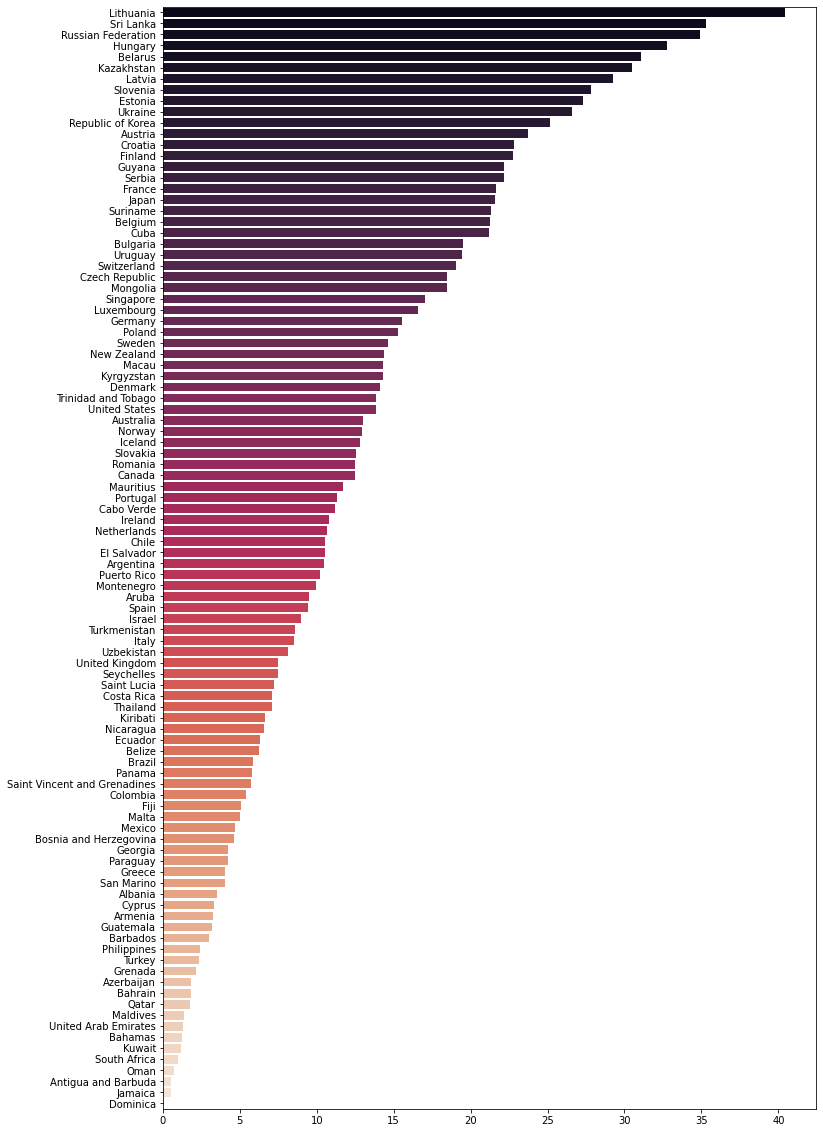

In [ ]:
## Agrupar paises com maior média de suicidio
suicedes_country = dict(df.groupby('country')['suicides/100k pop'].mean().nlargest(100))

a4_dims = (11.7, 20.27);
fig, ax = plt.subplots(figsize=a4_dims);
sns.barplot(list(suicedes_country.values()),list(suicedes_country.keys()),palette="rocket");




### Comparação da Taxa de Suicidio Brasil x Mundo. 

Farei uma comparação relacionando o número de suicídios cometidos no Brasil e no Mundo a cada 100 mil habitantes; dessa forma analisaremos a linha de tendência para ambos os casos.

Facilmente percebe-se no gráfico acima que embora o percentual de mortes por suicídios no Brasil(linha laranja) esteja a baixo da média mundial. O numero aumentou nos ultimos 30 anos a uma média de **1,03% ao ano**.
Do forma contrário acorre com a taxa média mundial(linha azul) cujo reverteu seu slope e vem caindo desde 1995 a uma média de decrescimento a **1,46% ao ano**.




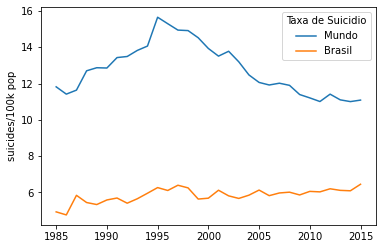

In [ ]:
# Pegar a média mundial do Brasil em suicidios. 
years = df_Brasil.year.unique()
suicedes_brasil_mean = df_Brasil.groupby('year')['suicides/100k pop'].mean()
suicedes_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# Como brasil não tem os dados de 2016, deve-se eliminar do dataframe

suicedes_world_mean.drop(2016,inplace= True)


# Plotar lineplot comparativo entre Brasil e o mundo. 

ax = sns.lineplot(x=years,y= suicedes_world_mean, label="Mundo")
ax = sns.lineplot(x=years,y= suicedes_brasil_mean, label="Brasil")

plt.legend(title = "Taxa de Suicidio")
plt.show()

Facilmente percemos no gráfico acima que embora o percentual de mortes por suicidios no Brasil(linha laranja) esteja a baixo da média Mundial. O numero de vem crescendo nos ultimos 30 anos a uma média de crescimento em torno de **1,03% ao ano**.

De forma contrária acorre com a taxa média mundial(linha azul) cujo reverteu seu `slope`e vem caindo desde 1995 a uma média de descrescimento a  **1,46% ao ano**.

### Faixa etária com maior numero de suicidios

Nesta reprensetação identificarei a faixa etária com a maior representatividade de pessoas que tiram a própria vida. Será utilizado o número de suicídios total para avaliar no Brasil qual a faixa etária com maior numero de ocorrência e se houve mudança deste perfil nos últimos 30 anos.

In [ ]:
# Criar Tabela Dinâmica. 
table = pd.pivot_table(df_Brasil,values= 'suicides_no' ,columns= 'age',index= 'year' )

# Reordenando as colunas 
columns_order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
table =table.reindex(columns_order,axis=1)


# 5 Primeiras linhas
table.head()


age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


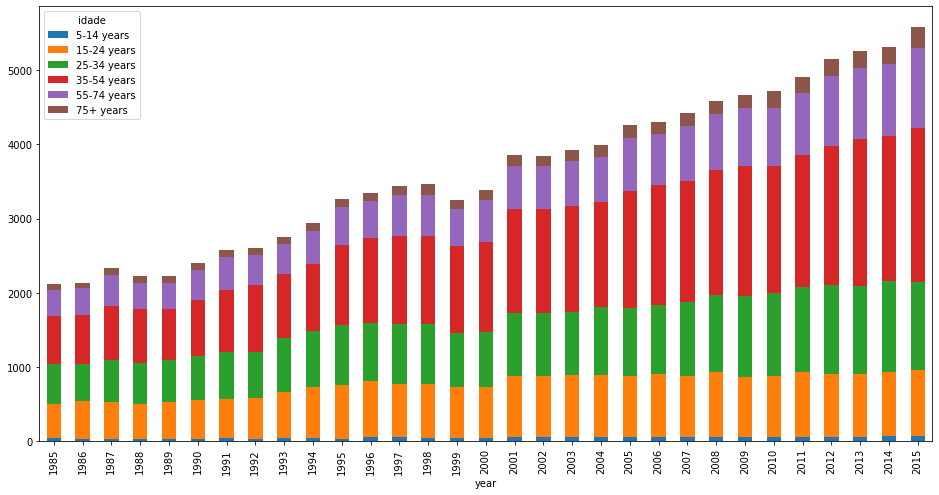

In [ ]:
# Plotar o pivotab
table.plot.bar(stacked=True, figsize=(16,8));
plt.legend(title="idade");

No gráfico acima notamos que com o passar dos anos a faixa etária de 35–54 anos é a que tem o maior percetual de crescimento e de incidentes contra a própria vida.

As duas faixas mais criticas são as de 35–54 anos totalizando **35,2%** das ocorrênciaas e 25–34 anos com **23,2%**.

### Faixa etária com maior numero de suicidios - Representação Brasil x Mundo

Podemos fazer outra comparação melhor repensentada gráficamente. A seguir será feito a mesma análise porém alterando o numero total de casos para cada 100 mil habitantes.


In [ ]:
# Criar um dicionário, selecionar chave e valor da média de suicidio /100 k da pop
labels = ['15-24 years', '25-34 years', '35-54 years','5-14 years', '55-74 years', '75+ years']
age_world = list(df.groupby('age')['suicides/100k pop'].mean())
age_brasil = list(df_Brasil.groupby('age')['suicides/100k pop'].mean())

#Ajustes para construir o gráfico.
x = np.arange(len(labels))
width_bar = 0.35

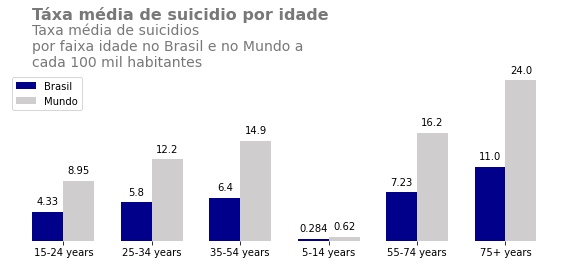

In [ ]:
#Crindo Representação Gráfica
fig,ax = plt.subplots(figsize=(8,4))

# Plotar antes e depois separados.
graph1 = ax.bar(x - width_bar/2,age_brasil,width_bar,label ="Brasil",color='Darkblue')
graph2 = ax.bar(x + width_bar/2,age_world,width_bar,label = "Mundo",color="#CFCDCE")
#253760
#Remover grades e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover o eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x                
#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{0:.3}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, +5),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="Black",
                    )

# plotar labels dentro das barras
autolabel(graph1)
autolabel(graph2)

#plotar titulo
plt.text(-0.35,33,"Táxa média de suicidio por idade",
         fontsize=16,
         color="#787878",
         weight= "bold")

#Plotar subtitulo
plt.text(-0.35, 29,
         "Taxa média de suicidios \n"
         "por faixa idade no Brasil e no Mundo a \n" 
         'cada 100 mil habitantes',
         verticalalignment="center",
         fontsize= 14,
         color="#787878")

#Label no Eixo. 
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

# legenda
ax.legend()

# plotar gráfico
fig.tight_layout()
plt.show()

Para explicar o gráfico acima temos o seguinte. Foi utilizado toda a amostra de dados desde de 1985–2015 e o número de incedente fracionado a cada 100 mil habitante. Conclui-se que na faixa etária de 15–24 anos, para cada 100 mil habitantes desta faixa etária, no Brasil em média 4,33 pessoas cometeram crime contra a própria vida.

Portanto contrariando o gráfico anterior por mais que a faixa etária dos 35–54 seja a com maior número de casos, no contexto numero de incidentes por porcentagem populacional em cada faixa etária, as pessoas com 55–74 anos e +75 tem maior tendência ao suicidio.

## Média de suicidos entre homens e mulheres. Brasil e Mundo

Abaixo faremos uma leitura semelhante a superior. Identificaremos qual a proporcionalidade entre os sexos de cometer suicídio.

Após a confecção do gráfico concluimos que existe uma semelhança entre Brasil e mundo preponderando em aporixmandamente **80 %** de tendência a suicídio para o sexo Masculino. **Brasil 81% e Mundo 78%**


In [ ]:
# Criar um dicionario selecionar chave e valor da média de suicidio /100 k da pop

sex_world = dict(df.groupby('sex')['suicides/100k pop'].mean())
# Declarar as variaveis
man_world = sex_world['male']
woman_world= sex_world['female']


In [ ]:
# Dados Brasil. 
sex_brasil = dict(df_Brasil.groupby('sex')['suicides/100k pop'].mean())
man_brasil = sex_brasil['male']
woman_brasil = sex_brasil['female']
sex_brasil

{'female': 2.1227956989247314, 'male': 9.569247311827954}

In [ ]:
# Dados a serem plotados.
labels = ['Feminino','Masculino']
brasil = [woman_brasil,man_brasil]
mundo = [woman_world,man_world]


#Ajustes para construir o gráfico.
x = np.arange(len(labels))
width_bar = 0.35






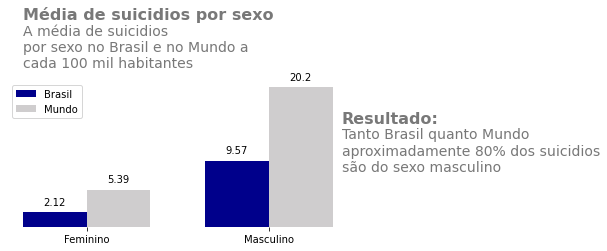

In [ ]:
# Criar uma figura para gráfico de barras. 
fig,ax = plt.subplots(figsize=(8.5,4))

# Plotar antes e depois separados.
graph1 = ax.bar(x - width_bar/2,brasil,width_bar,label ="Brasil",color='Darkblue')
graph2 = ax.bar(x + width_bar/2,mundo,width_bar,label = "Mundo",color="#CFCDCE")
#253760
#Remover grades e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover o eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
#plt.tick_params(axis='both',which ='both',bottom = False,top = False,labelbottom = True)
                
#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{0:.3}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, +5),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="Black",
                    )

# plotar labels dentro das barras
autolabel(graph1)
autolabel(graph2)

#plotar titulo
plt.text(-0.35,30,"Média de suicidios por sexo",
         fontsize=16,
         color="#787878",
         weight= "bold")

#Plotar subtitulo
plt.text(-0.35, 26,
         "A média de suicidios \n"
         "por sexo no Brasil e no Mundo a \n" 
         'cada 100 mil habitantes',
         verticalalignment="center",
         fontsize= 14,
         color="#787878")

#Plotar Resultado
plt.text(1.4, 15,
         "Resultado:",
         fontsize=16,
         color="#787878",
         weight= "bold")

#Plotar Resultado subtitulo
plt.text(1.4, 11,
         "Tanto Brasil quanto Mundo \n"
         "aproximadamente 80% dos suicidios\n"
         "são do sexo masculino",
         verticalalignment="center",
         fontsize= 14,
         color="#787878")

#Label no Eixo. 
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

# legenda
ax.legend()

# plotar gráfico
fig.tight_layout()
plt.show()

       


                    

## Correlação entre PIB, IDH e numero de suicidios.

Criando uma matriz de correlação e plotando um heatmap, subentende-se que o aumento no `PIB_per_` capita não diminuiu o número de suicídios por 100 mil habitantes. Na verdade, ele se manteve estável,ou seja não importa a situação financeira ou classe social que a pessoa esteja, não é essa variável que defini alguem com tendência ao suicídio.

Em relação ao `IDH`, como mencionado no projeto , há muitos valores ausentes nas células, certa de 70 % em ambos os casos, portanto a variável não pode ser utilizada para análise. O mais correto é obter um outro banco de dados para realacionar com o dataset que foi trabalhado neste artigo afim de desenvolver uma nova análise e identificar se há uma relação direta entre o IDH e o numero de sucídios.

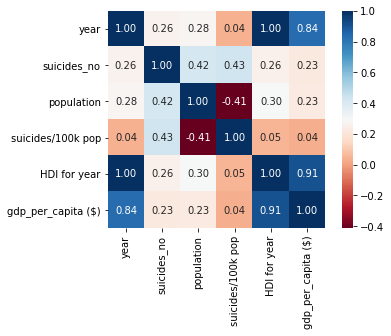

In [ ]:
corr = df_Brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Resultados

- **Paises com maior numero de suicidios** : Históricamente paises da Asiáticos e da Europa Oriental.
- **Comparação da Taxa de Suicidio Brasil x Mundo**: Brasil com crescimento de **1,03%** ao Ano e Mundo com descrecimento de **1,46%** ao ano desde 1995
- **Faixa etária com maior numero de suicidios** = **35-54 anos** totalizando **35,2%** das ocorrênciaas e **25-34 anos** com **23,2%**
- Média de suicidos entre homens e mulheres. Brasil e Mundo : Tendência a suicidio para o sexo Masculino **Brasil 81% e Mundo 78%**
- Correlação entre PIB, IDH e numero de suicidios: Não é possivel fazer a analise com o banco de Dados utilizado devido ao elevado numero de celulas ausentes.

## Data Science na prevenção do suicídio

O objetivo deste artigo foi de desenvolver projeto de análise de dados visando conscientizar a minha comunidade sobre a real importância de um problema tão latente. Infelizmente por falta de empatia acabamos negligenciado ou ignorado por boa parte das pessoas.

O conjunto de dados usado aqui é simplificado, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do tema.

Há diversas iniciativas dentro do campo da Inteligência Artificial visando não apenas a conscientização, mas também prevenção de suicídios. Uma das mais populares diz respeito à análise de postagens em [redes sociais](https://g1.globo.com/ciencia-e-saude/noticia/2019/04/04/como-a-inteligencia-artificial-e-usada-para-combater-o-bullying-e-monitorar-pensamentos-suicidas.ghtml), onde algoritmos de Machine Learning são capazes de identificar potenciais suicidas e alertar outras pessoas.

Até mesmo o [facebook](https://veja.abril.com.br/tecnologia/novo-chatbot-do-facebook-oferece-apoio-a-quem-pensa-em-suicidio/) disponibilizou um Chatbox em parceria com o Centro de Valorização a Vida (CVV) para agilizar os atendimentos e priorizar a quem se deve ajudar.

E resaltando também o trabalho do [Setembro Amarelo](https://www.setembroamarelo.com/) **A campanha é em setembro, mas falar sobre prevenção do suicídio em todos os meses do ano é fundamental**

Espero que este artigo tenha trazido um pouco de conhecimento e alertado você sobre um problema tão sério. 

